#Group 4: SEGMENTING BOOKS

<h2> INTRODUCTION </h2>

<p> This project aims to make books more discoverable by utilizing Natural Language Processing (NLP) for theme segmentation and genre categorization. With the massive number of books available, it is hard to find relevant content. Genre categorization classifies books to some degree, but identifying the theme of a book—action, romance, or humor—allows for better segmentation. <p>
<p>  By supervised learning, the project tags books based on their genres, while unsupervised methods like topic modeling (LDA) and K-Means clustering find prevalent themes in the text. By using NLP methods, such as TF-IDF for feature extraction and LDA for topic modeling, this project seeks to create a system that helps readers find books and individual thematic subparts more effectively, improving their reading experience as a whole. <p>

<h3> Libraries Used </h3>

*   PyPDF2: A library for reading, extracting text, and manipulating PDF files.

*   re: Built-in Python module for working with regular expressions (text pattern matching)

*   pandas: A data analysis and manipulation library, useful for handling structured text data

*   matplotlib.pyplot: A visualization library used for plotting graphs and displaying insights

*   sklearn.feature_extraction.text.TfidfVectorizer: Converts text into numerical features using TF-IDF

*   sklearn.decomposition.LatentDirichletAllocation: Implements LDA, a topic modeling algorithm for discovering latent themes in text

*   sklearn.cluster.KMeans: Clustering algorithm that groups similar items based on patterns

*   nltk: The Natural Language Toolkit, a collection of tools for processing human language data

*   nltk.tokenize.sent_tokenize: Splits text into individual sentences for analysis

*   wordcloud.WordCloud: Generates visual word clouds from text data to highlight frequent words

In [1]:
!pip install PyPDF2

from PyPDF2 import PdfReader
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import nltk

# Download necessary NLTK data
# Download Punkt Sentence Tokenizer if you haven't already
nltk.download('punkt')     # punkt: Sentence tokenizer model to split text into sentences.
nltk.download('punkt_tab') # punkt_tab: Data tables used by the punkt sentence tokenizer.

from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


<h3> Loading and Extracting Text from a PDF </h3>
<p>Load the PDF file and extracts its text content. It reads all pages using PyPDF2, joins the extracted text, and removes unnecessary whitespace using regular expressions (re) to clean the text for further processing.<p>

In [2]:
# Load and extract text from PDF
pdf_path = "Love-Stories.pdf"
pdf_reader = PdfReader(pdf_path)
book_text = "\n".join([page.extract_text() for page in pdf_reader.pages if page.extract_text()])
cleaned_text = re.sub(r'\s+', ' ', book_text)

<h3> Sentence Tokenization and TF-IDF Transformation </h3>
<p> The text is tokenized into individual sentences using NLTK's sent_tokenize and stored in a pandas DataFrame. TF-IDF (Term Frequency-Inverse Document Frequency) is then applied using TfidfVectorizer to convert the text into numerical features, removing common stop words and limiting the top features to 1000.<p>

*   Sentence tokenization splits text into individual sentences, making it easier to process and analyze at a minute detailed level.
*   TF-IDF transforms text into numerical features by weighing words based on their frequency in a document and their rarity across a corpus, highlighting important terms.


In [3]:
# Tokenize sentences
text_chunks = [chunk for chunk in sent_tokenize(cleaned_text) if chunk.strip()]

# Create DataFrame
df = pd.DataFrame({'Text': text_chunks})

# Converts text to numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['Text'])

<h3> LDA for Topic Modeling </h3>
<p>LDA (Latent Dirichlet Allocation) is used to determine latent topics of the text through grouping words based on relevance. It is being used here in order to project three topics out of the TF-IDF features obtained from the text.<p>

In [4]:
# LDA finds the hidden topics in text
# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=3, random_state=42)
X_topics = lda.fit_transform(X_tfidf)

<h3> K-Means Clustering </h3>
<p>K-Means clustering classifies documents into clusters based on their topic distribution. It has been used in this case for clustering the documents into three categories based on topics identified by LDA.<p>

In [5]:
# K-Means groups documents together based on their topic distribution
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_topics)

<h3> Displaying Top Words for Each Topic </h3>
<p> Displays the top words for every one of the topics identified by LDA. It selects the five most important words for every topic from their weights and prints them, providing an insight into the key themes of the topics.<p>

In [6]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
topic_keywords = {}
print("Top words for each topic:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-5:]]
    topic_keywords[topic_idx] = top_words
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Top words for each topic:
Topic 0: day, macedonia, love, parents, skopje
Topic 1: wife, long, life, didn, time
Topic 2: ivan, told, love, took, woman


<h3>Generating Word Clouds</h3>
<p>Word clouds are generated to visually represent the most frequent words for each topic. The top words for each topic are used to create a word cloud, offering a quick visual overview of the key themes, which are displayed using matplotlib.<p>

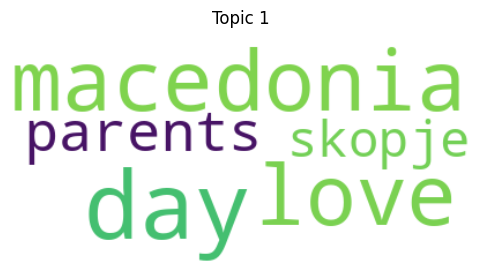

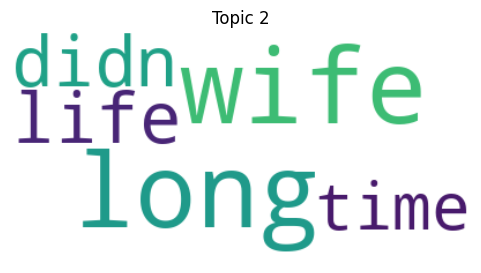

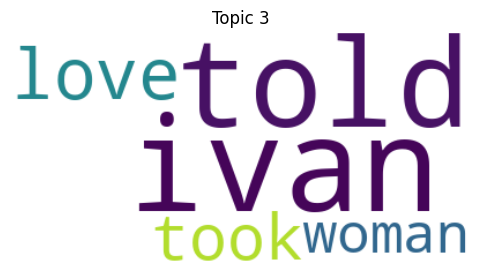

In [7]:
# Generate word clouds
for i in range(3):
    wordcloud = WordCloud(width=400, height=200, background_color="white").generate(" ".join(topic_keywords[i]))
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {i + 1}")
    plt.show()

<h3> Cluster Distribution and Genre Mapping </h3>
<p>The cluster distribution is displayed, followed by sample texts from each cluster. Genre labels such as History, Romance, and Self-Help are assigned to the clusters, and the final genre mapping is printed.<p>

In [8]:
# Display cluster distribution
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Display sample texts from each cluster
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    sample_texts = df[df['Cluster'] == cluster]['Text'].sample(3, random_state=42)
    for text in sample_texts:
        print(text)

# Assign simple genre labels
cluster_to_genre = {0: "History", 1: "Romance", 2: "Self-Help"}
df['Genre'] = df['Cluster'].map(cluster_to_genre)

# Print final genre mapping
print("\nFinal Genre Mapping:")
print(df[['Text', 'Cluster', 'Genre']].head(10))


Cluster Distribution:
Cluster
2    513
0    496
1    469
Name: count, dtype: int64

Cluster 2:
He told no one of his plans.
The kidney transplant was successful, the expenses were covered and Kemal and his parents stayed at the Holiday Inn until Nermin recovered.
They would go to Macedonia, in Ohrid, for their honeymoon.

Cluster 1:
Their relationship was just a façade without a firm foundation.
His first misfortune in Canada was his friendship with a young Macedonian saleswoman in a textile shop where he went to buy a knitted pullover.
Aware that nothing happens by itself and that happiness and attraction should be looked for and enjoyed to the fullest ZKHQWKH\DUHIRXQG.D WHDQG/MXSþRILOOHGWKHLUOLYHVZLWK the elixir of youth and passion.

Cluster 0:
They had shown him numerous interesting places in Prilep and its vicinity, and even the villages where they were born.
Love at first sight!
He told her that he was not married, that was born in Canada and had graduated from the S

<h3> Plotting Genre Distribution </h3>
<p>The genre distribution is then plotted as a bar chart to show the number of sentences in each genre.
<p>

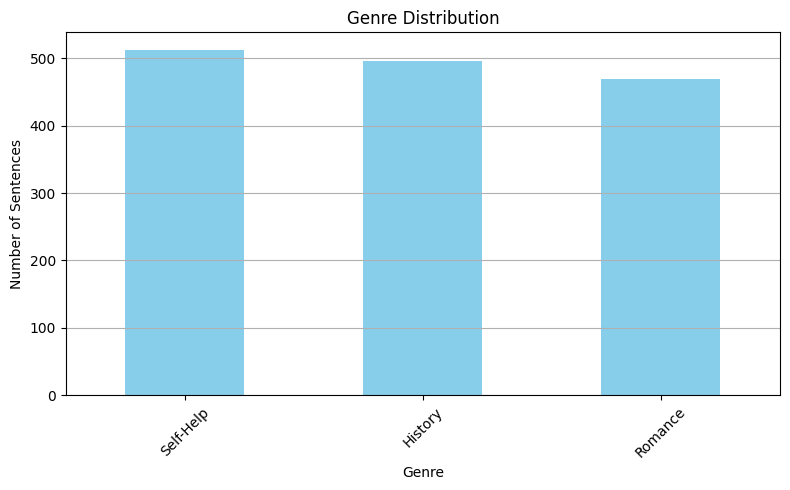

In [9]:
# Plot genre distribution
plt.figure(figsize=(8, 5))
df['Genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Number of Sentences")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()